In [133]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [134]:
df_wine = pd.read_csv('C:\VS Code\wine\wine.csv')

df_wine.head(5)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


Сколько всего дегустаторов приняло участие в винных обзорах?

In [135]:
taster = df_wine.nunique()['taster_name']
print (f' Количество дигустаторов: {taster} ')

 Количество дигустаторов: 19 


Какова максимальная цена за бутылку в этом наборе данных?

In [136]:
max_prise = df_wine['price'].max()
print (f' Максимальная цена за бутылку: {max_prise} у.е.')

 Максимальная цена за бутылку: 3300.0 у.е.


Составьте чек-лист всех этапов жизненного цикла модели машинного обучения для создания ИИ-сомелье. 
Подробно раскройте процесс разведывательного анализа данных с подэтапами. 


1. Определение проблемы для бизнеса.
2. Сбор максимально возможного  количества данных.
3. Очистка данных (определяем пропущенные значения, аномалии и выбросы в данных)
4. EDA(разведывательный анализ данных)
     -  Проектирование модели ( создание новых  признаков на основе полученного датасета)
     - Отбор признаков
     - Метод кодирование признаков
     - Проверка гипотез
5. Этап разработки модели
6. Этап публикации  модели

Проанализируйте представленный датасет и перечислите все числовые признаки через запятую

In [137]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.9+ MB


Проанализируйте датасет на наличие дублирующихся винных обзоров. Если дублирующиеся записи есть, удалите их

In [138]:
print(f'Количество строк: {df_wine.shape[0]}')


Количество строк: 129971


In [139]:
dubl = list(df_wine.columns)
mask = df_wine.duplicated(subset=dubl)
wine_dubl = df_wine[mask]
wine_dubl.shape[0]
print(f'Число найденных дубликатов: {wine_dubl.shape[0]}')

Число найденных дубликатов: 9983


In [140]:
# удаление дубликатов
wine_df = df_wine.drop_duplicates(subset=dubl)
print(f'Количество строк: {wine_df.shape[0]}')


Количество строк: 119988


Проверьте датасет на наличие пропусков в данных.
В каких из представленных признаках были обнаружены пропуски?

In [141]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119988 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                119929 non-null  object 
 1   description            119988 non-null  object 
 2   designation            85443 non-null   object 
 3   points                 119988 non-null  int64  
 4   price                  111593 non-null  float64
 5   province               119929 non-null  object 
 6   region_1               100428 non-null  object 
 7   region_2               46769 non-null   object 
 8   taster_name            95071 non-null   object 
 9   taster_twitter_handle  90542 non-null   object 
 10  title                  119988 non-null  object 
 11  variety                119987 non-null  object 
 12  winery                 119988 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.8+ MB


Обработайте пропущенные значения в наборе данных любым известным вам способом, который вы изучили в модуле PYTHON-14. Очистка данных.

Воспользуйтесь правилами:

* Если какой-то из признаков имеет более 30-40 % пропусков, лучше избавьтесь от него: его заполнение может привести к сильному искажению общего распределения, а удаление записей — к большой утрате данных.
* Заполняйте данные с умом! Если перед вами количественный признак, то использование нецелого числа в качестве константы является как минимум нелогичным.
* Вы можете оставить пропуски как есть, просто заменив их на какой-то специальный символ. Например, для числовых неотрицательных признаков можно использовать число -1, а для категориальных — строку 'unknown'.

In [142]:
# Определим средний по столбцам результат метода isnull(),умножаем на 100%, получаем процент пропусков по столбцам , где есть пропуски
cols_null_percent = wine_df.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null)

region_2                 61.021936
designation              28.790379
taster_twitter_handle    24.540787
taster_name              20.766243
region_1                 16.301630
price                     6.996533
country                   0.049172
province                  0.049172
variety                   0.000833
dtype: float64

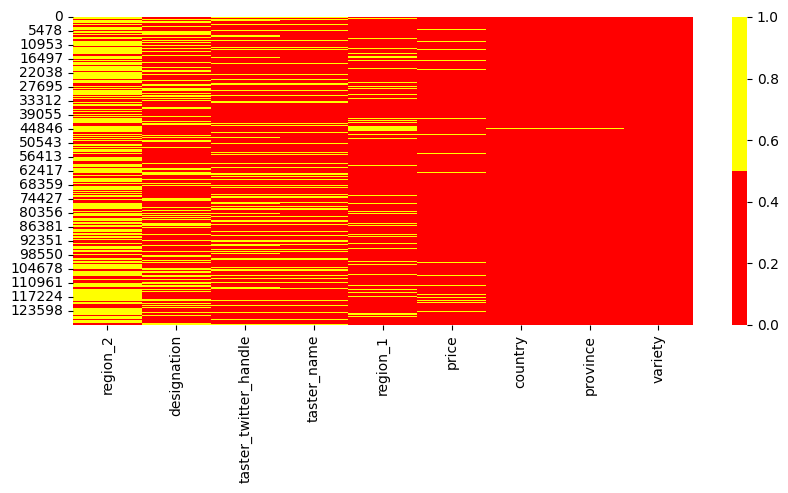

In [143]:
# Отобразим визуально
fig = plt.figure(figsize=(10, 4))
cols = cols_with_null.index
ax = sns.heatmap(
    wine_df[cols].isnull(),
    cmap=sns.color_palette(['red', 'yellow']),
)

In [144]:
# Видим, что в столбце region_2 пропусков больше допучтимого, соответсвенно ег можно удалить
wine_df = wine_df .drop(['region_2'], axis=1)



In [145]:
# Проверяем
cols_null_percent = wine_df.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null)

designation              28.790379
taster_twitter_handle    24.540787
taster_name              20.766243
region_1                 16.301630
price                     6.996533
country                   0.049172
province                  0.049172
variety                   0.000833
dtype: float64

In [146]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119988 entries, 0 to 129970
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                119929 non-null  object 
 1   description            119988 non-null  object 
 2   designation            85443 non-null   object 
 3   points                 119988 non-null  int64  
 4   price                  111593 non-null  float64
 5   province               119929 non-null  object 
 6   region_1               100428 non-null  object 
 7   taster_name            95071 non-null   object 
 8   taster_twitter_handle  90542 non-null   object 
 9   title                  119988 non-null  object 
 10  variety                119987 non-null  object 
 11  winery                 119988 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 11.9+ MB


In [147]:
# обрабатываем столбцы с значительным  процентом пропусков, но не перевалиышие за критическое значение процента пропусков.
# Т.к. категориальные  признаки, заменяем на  unknown
wine_df['designation'] = wine_df['designation'].fillna('unknown')
wine_df['region_1'] = wine_df['region_1'].fillna('unknown')
wine_df['taster_name'] = wine_df['taster_name'].fillna('unknown')
wine_df['taster_twitter_handle'] = wine_df['taster_twitter_handle'].fillna('unknown')

In [151]:
values = { 'price' : wine_df['price'].mean(), 
          'country': wine_df['country'].mode()[0], 
          'province': wine_df['province'].mode()[0], 
          'variety': wine_df['variety'].mode()[0]}
wine_df = wine_df.fillna(values)

In [152]:
wine_df.head()

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.620747,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [153]:
cols_null_percent = wine_df.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null)

Series([], dtype: float64)

In [ ]:
wine_df